## [Importing Cells in NetPyNE](http://www.netpyne.org/advanced.html#importing-externally-defined-cell-models)

# (1) Clone repository and compile mod files

**Determine your location in the directory structure**

In [ ]:
!pwd

/content


**Move to (or stay in) the '/content' directory**

In [ ]:
%cd /content/

/content


**Ensure you are in the correct directory** --> *Expected output: "/content"*

In [ ]:
!pwd

/content


**Install NEURON and NetPyNE, and import matplotlib**

In [2]:
!pip install neuron
!pip install netpyne 
import matplotlib
import os
import json

     |████████████████████████████████| 12.6MB 12.5MB/s 
     |████████████████████████████████| 317kB 24.9MB/s 


In [1]:
%matplotlib inline

This next line will **detect if the directory already exists** (i.e. you are re-running this code), and will **delete it** to prevent future errors. 

In [ ]:
if os.path.isdir('/content/cells_netpyne2021'):
  !rm -r /content/cells_netpyne2021

**Clone repository with the necessary cell and mod files**

In [ ]:
!git clone https://github.com/ericaygriffith/cells_netpyne2021.git

Cloning into 'cells_netpyne2021'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 33 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (33/33), done.


**Move into the repository with all the necessary files**

In [ ]:
cd cells_netpyne2021/

/content/cells_netpyne2021


**Ensure you are in the repository with the 'pwd' command** --> *Expected output*: '/content/cells_netpyne2021'

In [ ]:
!pwd

/content/cells_netpyne2021


**Compile the mod files** --> *Expected output:* creation of an 'x86_64' directory 

In [ ]:
!nrnivmodl

/content/cells_netpyne2021
Mod files: "./cadad.mod" "./HH2.mod" "./htc.mod" "./IT2.mod" "./IT.mod" "./kl.mod" "./tia.mod"

Creating x86_64 directory for .o files.

COBJS=''
 -> Compiling mod_func.c
 -> NMODL ../cadad.mod
x86_64-linux-gnu-gcc -O2   -I.   -I/usr/local/lib/python3.7/dist-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c mod_func.c -o mod_func.o
(cd ".."; MODLUNIT=/usr/local/lib/python3.7/dist-packages/neuron/.data/share/nrn/lib/nrnunits.lib /usr/local/lib/python3.7/dist-packages/neuron/.data/bin/nocmodl cadad.mod -o "/content/cells_netpyne2021/x86_64")
 -> NMODL ../HH2.mod
(cd ".."; MODLUNIT=/usr/local/lib/python3.7/dist-packages/neuron/.data/share/nrn/lib/nrnunits.lib /usr/local/lib/python3.7/dist-packages/neuron/.data/bin/nocmodl HH2.mod -o "/content/cells_netpyne2021/x86_64")
 -> NMODL ../htc.mod
(cd ".."; MODLUNIT=/usr/local/lib/python3.7/dist-packages/neuron/.data/share/nrn/lib/nrnunits.lib /usr/local/lib/python3.7/dist-packages/neuron/.data/bin/noc

# (2) Importing cells from different file formats

**Set up netParams object**

In [ ]:
from netpyne import specs, sim   

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

**2a. Import cell from *.json* format**

In [ ]:
netParams.loadCellParamsRule(label='TC_reduced', fileName = 'TC_reduced_cellParams.json')

In [ ]:
netParams.cellParams['TC_reduced']

{'conds': {'cellModel': 'HH_reduced', 'cellType': 'TC'},
 'globals': {'erev_kl': -95.0, 'q10m_ittc': 3.55, 'v_init': -70.0},
 'secLists': {},
 'secs': {'soma': {'geom': {'L': 96.0,
    'Ra': 100.0,
    'cm': 1.0,
    'diam': 96.0,
    'nseg': 1,
    'pt3d': [[0, 0, 0, 96.0], [0, 96.0, 0, 96.0]]},
   'ions': {'ca': {'e': 132.4579341637009, 'i': 5e-05, 'o': 2.0},
    'k': {'e': -95.0, 'i': 54.4, 'o': 2.5},
    'na': {'e': 50.0, 'i': 10.0, 'o': 140.0}},
   'mechs': {'cadad': {'cainf': 0.00024,
     'depth': 1.0,
     'kd': 0.0,
     'kt': 0.0,
     'taur': 5.0},
    'hh2ad': {'gkbar': 0.012, 'gnabar': 0.02, 'vtraub': -63.0},
    'htc': {'Pc': 0.01,
     'cac': 0.002,
     'exptemp': 36.0,
     'ginc': 2.0,
     'gmax': 1e-06,
     'k2': 0.0004,
     'k4': 0.001,
     'nca': 4.0,
     'nexp': 1.0,
     'shift': 0.0,
     'taum': 20.0},
    'ia': {'exptemp': 23.5, 'gmax': 0.007, 'q10': 3.0},
    'ittc': {'gmax': 0.002, 'shift': 3},
    'kl': {'gmax': 2.3e-05},
    'pas': {'e': -50, 'g': 1.8

**2b. Import a detailed morphology from a *.swc* file**

In [ ]:
netParams.importCellParams(
        label='PYR_HH3D_swc',
        conds={'cellType': 'PYR', 'cellModel': 'HH3D_swc'},
        fileName='BS0284.swc',
        cellName='swc_cell')

{conds: {cellType: 'PYR', cellModel: 'HH3D_swc'}, secs: {soma_0: {geom: {L: 38.71370003363001, nseg: 1, diam: 11.766242500611416, Ra: 35.4, cm: 1.0, pt3d: [(-8.3100004196167, -8.279999732971191, -19.309999465942383, 2.2491800785064697), (-6.970000386238098, -6.159999847412109, -16.769999504089355, 7.460279941558838), (-6.350000381469727, -4.999999761581421, -13.9399995803833, 9.697859764099121), (-5.600000381469727, -4.159999847412109, -11.169999122619629, 11.111539840698242), (-4.630000352859497, -2.8799996376037598, -8.459999084472656, 11.920280456542969), (-4.020000457763672, -2.179999828338623, -6.669999122619629, 12.933099746704102), (-3.090000629425049, -1.7699995040893555, -4.959999084472656, 13.913820266723633), (-1.330000400543213, -0.23999977111816406, -3.5799999237060547, 14.734780311584473), (-0.7300004959106445, -0.7499995231628418, -1.779998779296875, 14.915260314941406), (0.0, 0.0, 0.0, 15.22443962097168), (0.22999954223632812, -0.679999828338623, 1.9500007629394531, 15.

In [ ]:
netParams.cellParams.keys()

odict_keys(['TC_reduced', 'PYR_HH3D_swc'])

**2c. Import a cell from a *.hoc* (NEURON) file**

In [ ]:
netParams.importCellParams(
        label='PYR_HH3D_hoc',
        conds={'cellType': 'PYR', 'cellModel': 'HH3D_hoc'},
        fileName='geom.hoc',
        cellName='E21',
        importSynMechs=False)

{conds: {cellType: 'PYR', cellModel: 'HH3D_hoc'}, secs: {soma: {geom: {L: 15.0996688705415, nseg: 1, diam: 12.0, Ra: 35.4, cm: 1.0, pt3d: [(10.0, -8.0, -8.0, 12.0), (0.0, 0.0, 0.0, 12.0)]}, topol: {}, mechs: {}}, dendrite_0: {geom: {L: 25.478865883553066, nseg: 1, diam: 3.1306256413628453, Ra: 35.4, cm: 1.0, pt3d: [(5.62701416015625, -3.2089996337890625, -2.292999267578125, 8.392000198364258), (-4.67999267578125, -10.990001678466797, 0.220001220703125, 1.3899999856948853), (-6.67999267578125, -11.599998474121094, 0.220001220703125, 1.3899999856948853), (-12.589996337890625, -12.700000762939453, 1.7299995422363281, 1.149999976158142), (-16.1300048828125, -13.830001831054688, 2.5600013732910156, 1.149999976158142), (-16.17999267578125, -13.610000610351562, 2.5600013732910156, 1.149999976158142)]}, topol: {parentSec: 'soma', parentX: 1.0, childX: 0.0}, mechs: {}}, dendrite_1: {geom: {L: 4.899324530307755, nseg: 1, diam: 1.0349999964237213, Ra: 35.4, cm: 1.0, pt3d: [(-16.17999267578125, -1

In [ ]:
netParams.cellParams.keys()

odict_keys(['TC_reduced', 'PYR_HH3D_swc', 'PYR_HH3D_hoc'])

**2d. Import a cell from a *.py* (python) file**

In [ ]:
netParams.importCellParams(
        label='sRE_py',
        conds={'cellType': 'sRE', 'cellModel': 'HH'},
        fileName='sRE.py',
        cellName='sRE',
        importSynMechs=False)

{conds: {cellType: 'sRE', cellModel: 'HH'}, secs: {soma: {geom: {L: 64.86, nseg: 1, diam: 70.0, Ra: 100.0, cm: 1.0}, topol: {}, mechs: {cadad: {depth: 1.0, taur: 5.0, cainf: 0.00024, kt: 0.0, kd: 0.0}, hh2ad: {gnabar: 0.09, gkbar: 0.01, vtraub: -50.0}, itre: {gmax: 0.002, shift: 2.0}, kl: {gmax: 3e-06}, pas: {g: 5e-05, e: -77.0}}, ions: {ca: {e: 132.4579341637009, i: 5e-05, o: 2.0}, k: {e: -95.0, i: 54.4, o: 2.5}, na: {e: 50.0, i: 10.0, o: 140.0}}}}, secLists: {SectionList[0]: [], SectionList[1]: []}, globals: {erev_kl: -95.0, q10h_itre: 3.0}, _repr_mimebundle_: {}}

In [ ]:
netParams.cellParams.keys()

odict_keys(['TC_reduced', 'PYR_HH3D_swc', 'PYR_HH3D_hoc', 'sRE_py'])

**EXERCISE: import the other swc file contained in the cells_netpyne2021 directory**

In [ ]:
netParams.importCellParams(
    label='mouse_hipp_swc',
    conds={'cellType': 'hipp','cellModel': 'HH3D'},
    fileName='mouseGABA_hipp.swc',
    cellName='swc_hippCell'
)

{conds: {cellType: 'hipp', cellModel: 'HH3D'}, secs: {soma_0: {geom: {L: 4.802000045776367, nseg: 1, diam: 4.802000045776367, Ra: 35.4, cm: 1.0, pt3d: [(-2.4010000228881836, 0.0, 0.0, 4.802000045776367), (0.0, 0.0, 0.0, 4.802000045776367), (2.4010000228881836, 0.0, 0.0, 4.802000045776367)]}, topol: {}, mechs: {}}, axon_0: {geom: {L: 41.465000908668614, nseg: 1, diam: 0.7369170749421915, Ra: 35.4, cm: 1.0, pt3d: [(1.2200000286102295, -0.8299999833106995, -0.7300000190734863, 2.0799999237060547), (1.8600000143051147, -1.2100000381469727, -1.2599999904632568, 1.3600000143051147), (1.8899999856948853, -2.140000104904175, -1.350000023841858, 1.3600000143051147), (2.4800000190734863, -2.990000009536743, -1.4199999570846558, 0.9800000190734863), (3.069999933242798, -3.609999895095825, -0.8100000023841858, 0.9399999976158142), (3.819999933242798, -4.409999847412109, -1.0299999713897705, 0.6000000238418579), (4.460000038146973, -5.130000114440918, -0.5899999737739563, 0.6000000238418579), (5.30

In [ ]:
netParams.cellParams.keys()

odict_keys(['TC_reduced', 'PYR_HH3D_swc', 'PYR_HH3D_hoc', 'sRE_py', 'mouse_hipp_swc'])

# (3) Explore and manipulate cell parameters

**Explore the cell types located in the netParams.cellParams dictionary**

In [ ]:
netParams.cellParams.keys()

odict_keys(['TC_reduced', 'PYR_HH3D_swc', 'PYR_HH3D_hoc', 'sRE_py', 'mouse_hipp_swc'])

**EXERCISE: Find the geometry (length & diameter) of the soma compartment for each of the above cells**

In [ ]:
netParams.cellParams['TC_reduced']['secs']['soma']['geom']['L']

96.0

In [ ]:
geom_TC = netParams.cellParams['TC_reduced']['secs']['soma']['geom']

In [ ]:
geom_TC['L']

96.0

**EXERCISE: List all of the channel mechanisms in the soma compartment of the thalamocortical cell model (TC_reduced)**

In [ ]:
netParams.cellParams['TC_reduced']['secs']['soma']['mechs'].keys()

dict_keys(['cadad', 'hh2ad', 'htc', 'ia', 'ittc', 'kl', 'pas'])

**Now we want to explore (and change) the values of a channel parameter in a given cell model**

In [ ]:
netParams.cellParams['TC_reduced']['secs']['soma']['mechs'].keys()

dict_keys(['cadad', 'hh2ad', 'htc', 'ia', 'ittc', 'kl', 'pas'])

In [ ]:
netParams.cellParams['TC_reduced']['secs']['soma']['mechs']['pas'].keys()

dict_keys(['e', 'g'])

In [ ]:
netParams.cellParams['TC_reduced']['secs']['soma']['mechs']['pas']['g'] = 5.0e05

In [ ]:
netParams.cellParams['TC_reduced']['secs']['soma']['mechs']['pas']['g']

500000.0

**EXERCISE: Change the conductance of the leak channel in the soma compartment of the reticular cell model (sRE.py)**



**EXERCISE: Insert a passive leak channel ('pas') into the soma compartment of the mouseGABA_hipp.swc cell model**


In [ ]:
netParams.cellParams['mouse_hipp_swc']['secs']['soma_0']['mechs']['pas'] = {'g': 0.0000357, 'e': -70}

**EXERCISE: Change the capacitance of all compartments in the model defined by BS0284.swc (PYR_HH3D_swc)**

In [ ]:
for sec in netParams.cellParams['PYR_HH3D_swc']['secs'].keys():
  netParams.cellParams['PYR_HH3D_swc']['secs'][sec]['geom']['cm'] = 1


**Now let's see how these changes affect the cell behavior by plotting cell's response to current input before and after param changes!**

**EXERCISE: First create a population of thalamocortical cells**

In [ ]:
netParams.popParams['TC_pop'] = {'cellType': 'TC', 'numCells': 1, 'cellModel': 'HH_reduced'}

**EXERCISE: Add hyperpolarizing current clamp stimulation of -0.1 nA to thalamocortical cell pop** 

In [ ]:
netParams.stimTargetParams['Input->TC_pop'] = {'source': 'Input', 'sec':'soma', 'loc': 0.5, 'conds': {'pop':'TC_pop'}}

**Add cfg params**

In [ ]:
## cfg  
cfg = specs.SimConfig()					            # object of class SimConfig to store simulation configuration
cfg.duration = 2*1e3 						            # Duration of the simulation, in ms
cfg.dt = 0.01								                # Internal integration timestep to use
cfg.verbose = 1							                # Show detailed messages 
cfg.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
cfg.recordStep = 0.01 			
cfg.filename = 'model_output'  			# Set file output name
cfg.saveJson = False
cfg.analysis['plotTraces'] = {'include': [0], 'saveFig': True} # Plot recorded traces for this list of cells
cfg.hParams['celsius'] = 36


**Create network and run simulation**

In [ ]:
sim.createSimulateAnalyze(netParams = netParams, simConfig = cfg)


Start time:  2021-05-25 13:28:13.326063

Creating network of 1 cell populations on 1 hosts...
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=0) of pop TC_pop, on node 0, 
Instantiated 1 cells of population TC_pop
  Number of cells on node 0: 1 
  Done; cell creation time = 0.01 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
Adding stims...
  Added Input IClamp to cell gid=0, sec=soma, loc=0.5, del=500, dur=800, amp=-0.1
  Number of stims on node 0: 1 
  Done; cell stims creation time = 0.00 s.
  Recording  V_soma from cell  0  with parameters:  {'sec': 'soma', 'loc': 0.5, 'var': 'v'}
Vector[2]
   Recording: spkt:
   Recording: spkid:
   Recording: V_soma:
      cell_0
   Recording: t:
Recording 1 traces of 1 types on node 0


Setting h global variables ...
  h.celsius = 36
  h.v_init = -65.0
  h.clamp_resist = 0.001
  h.erev_kl = -95.0
  h.q10m_ittc = 3.55
  h.q10h_itre = 3.0
  h.tstop = 2000.0
Minim

**EXERCISE: We see a rebound burst! T-type calcium channels are normally considered responsible for this behavior. What happens if we set the conductance of this channel to 0?**

**cfg params**

In [ ]:
## cfg  
cfg = specs.SimConfig()					            # object of class SimConfig to store simulation configuration
cfg.duration = 2*1e3 						            # Duration of the simulation, in ms
cfg.dt = 0.01								                # Internal integration timestep to use
cfg.verbose = 1							                # Show detailed messages 
cfg.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
cfg.recordStep = 0.01 			
cfg.filename = 'model_output'  			# Set file output name
cfg.saveJson = False
cfg.analysis['plotTraces'] = {'include': [0], 'saveFig': True} # Plot recorded traces for this list of cells
cfg.hParams['celsius'] = 36

**Run the sim**

In [ ]:
sim.createSimulateAnalyze(netParams = netParams, simConfig = cfg)


Start time:  2021-05-25 13:28:14.213259

Creating network of 1 cell populations on 1 hosts...
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=0) of pop TC_pop, on node 0, 
Instantiated 1 cells of population TC_pop
  Number of cells on node 0: 1 
  Done; cell creation time = 0.00 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
Adding stims...
  Added Input IClamp to cell gid=0, sec=soma, loc=0.5, del=500, dur=800, amp=-0.1
  Number of stims on node 0: 1 
  Done; cell stims creation time = 0.00 s.
  Recording  V_soma from cell  0  with parameters:  {'sec': 'soma', 'loc': 0.5, 'var': 'v'}
Vector[2]
   Recording: spkt:
   Recording: spkid:
   Recording: V_soma:
      cell_0
   Recording: t:
Recording 1 traces of 1 types on node 0


Setting h global variables ...
  h.celsius = 36
  h.v_init = -65.0
  h.clamp_resist = 0.001
  h.erev_kl = -95.0
  h.q10m_ittc = 3.55
  h.q10h_itre = 3.0
  h.tstop = 2000.0
Minim

# (4) Plotting Morphology

In [ ]:
netParams.popParams['HH3D_pop_hoc'] = {'cellType': 'PYR', 'numCells': 1, 'cellModel': 'HH3D_hoc'}


In [ ]:
sim.createSimulateAnalyze(netParams = netParams, simConfig = cfg)


Start time:  2021-05-25 13:28:14.990431

Creating network of 2 cell populations on 1 hosts...
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=0) of pop TC_pop, on node 0, 
Instantiated 1 cells of population TC_pop
Distributed population of 1 cells on 1 hosts: {0: [0]}, next: 0
Cell 0/0 (gid=1) of pop HH3D_pop_hoc, on node 0, 
Instantiated 1 cells of population HH3D_pop_hoc
  Number of cells on node 0: 2 
  Done; cell creation time = 0.02 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
Adding stims...
  Added Input IClamp to cell gid=0, sec=soma, loc=0.5, del=500, dur=800, amp=-0.1
  Number of stims on node 0: 1 
  Done; cell stims creation time = 0.00 s.
  Recording  V_soma from cell  0  with parameters:  {'sec': 'soma', 'loc': 0.5, 'var': 'v'}
Vector[2]
   Recording: spkt:
   Recording: spkid:
   Recording: V_soma:
      cell_0
   Recording: t:
Recording 1 traces of 1 types on node 0


Setting h globa

In [ ]:
%matplotlib inline

Plotting 3D cell shape ...
  There was an exception in plotShape(): 
    'Axes3DSubplot' object has no attribute 'set_box_aspect' 
    (<class 'AttributeError'>, AttributeError("'Axes3DSubplot' object has no attribute 'set_box_aspect'"), <traceback object at 0x7f0a93012280>)


-1

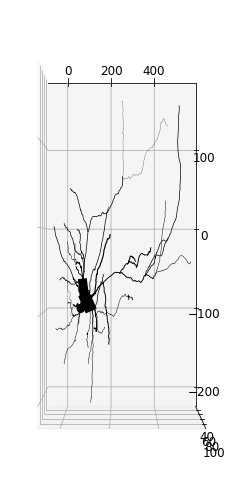

In [ ]:
sim.analysis.plotShape(includePre = [], includePost=['HH3D_pop_hoc'], showSyns=False, figSize=(4,9), dist=0.8, saveFig=True)

**EXERCISE: Try plotting the morphology of other cell models**

# (5) Making a Network

**EXERCISE: To begin creating a network, specify the geometry of the area you would like to model.**

In [ ]:
netParams.sizeX = 200

**Now let's set the propagation velocity and length constant:**

In [ ]:
netParams.propVelocity = 100.0 # propagation velocity (um/ms)

In [ ]:
netParams.probLengthConst = 150.0 # length constant for conn probability (um)

**EXERCISE: Now establish a few populations of cells**

**Now we need some synaptic mechanism parameters**

In [ ]:
netParams.synMechParams['exc'] = {'mod': 'Exp2Syn', 'tau1': 0.8, 'tau2': 5.3, 'e': 0} # NMDA synaptic mechanism

In [ ]:
netParams.synMechParams['inh'] = {'mod': 'Exp2Syn', 'tau1': 0.6, 'tau2': 8.5, 'e': -75}  # GABA synaptic mechanism


**Add some network stimulation parameters**

In [ ]:
netParams.stimSourceParams['bkg'] = {'type': 'NetStim', 'rate': 40, 'noise': 0.3}

**EXERCISE: modify the line below such that your stim object can target the populations in your network**

In [ ]:
netParams.stimTargetParams['bkg->all'] = {'source': 'bkg',
                                          'conds': {'cellType': ['E','I']}, 
                                          'weight': 10.0, 'sec': 'soma', 
                                          'delay': 'max(1, normal(5,2))', 
                                          'synMech': 'exc'}


**Add cell connectivity rules**

**EXERCISE: modify the lines below to fit your network**

In [ ]:
netParams.connParams['E->all'] = {
  'preConds': {'cellType': 'E'}, 'postConds': {'y': [100,1000]},  #  E -> all (100-1000 um)
  'probability': 0.1 ,                  # probability of connection
  'weight': '5.0*post_ynorm',         # synaptic weight
  'delay': 'dist_3D/propVelocity',      # transmission delay (ms)
  'synMech': 'exc'}                     # synaptic mechanism

**EXERCISE: Add the appropriate line(s) to run the network and plot a 2D representation of your network w/ connectivity between cells**

In [ ]:
cfg.analysis['plot2Dnet'] = {'saveFig': True}                                                # plot 2D cell positions and connections
cfg.analysis['plotConn'] = {'saveFig': True}                                                 # plot connectivity matrix
